# Sentiment Analysis on Restaurant Reviews

In [4]:
# All libraries imported in the project
import os
import numpy as np
import pylab as pl
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt # Required for plotting
from sklearn.neural_network import MLPClassifier

# set the path of the dataset here
# the dataset should be kept in the same location where this jupyter file goes
img_dir = os.path.join(os.getcwd(), "./business_review.csv") # directory path

# load the dataset into a dataframe
df = pd.read_csv(img_dir,names=['Sl.No.','Id','Ratings','Reviews'], header=None)


# Display the head of the dataframe as it is
df.head()



/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sl.No.,Id,Ratings,Reviews
0,NaN,business_id,stars,text
1,0.0,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...
2,1.0,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...
3,2.0,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...
4,3.0,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...


In [5]:
# We will pre-process the dataset to suit out purpose
# We have labeled reviews of ratings 1 & 2 as Negative
#                                        3 as Neutral &
#                                    4 & 5 as Positive
df.loc[df["Ratings"] == '1',"Ratings"] = 'Negative'
df.loc[df["Ratings"] == '2',"Ratings"] = 'Negative'
df.loc[df["Ratings"] == '3',"Ratings"] = 'Neutral'
df.loc[df["Ratings"] == '4',"Ratings"] = 'Positive'
df.loc[df["Ratings"] == '5',"Ratings"] = 'Positive'
# Display a list of first 5 instances of the dataset
df.head()

,Sl.No.,Id,Ratings,Reviews
0,NaN,business_id,stars,text
1,0.0,AEx2SYEUJmTxVVB18LlCwA,Positive,Super simple place but amazing nonetheless. It...
2,1.0,VR6GpWIda3SfvPC-lg9H3w,Positive,Small unassuming place that changes their menu...
3,2.0,CKC0-MOWMqoeWf6s-szl8g,Positive,Lester's is located in a beautiful neighborhoo...
4,3.0,ACFtxLv8pGrrxMm6EgjreA,Positive,Love coming here. Yes the place always needs t...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111c59da0>]],
      dtype=object)

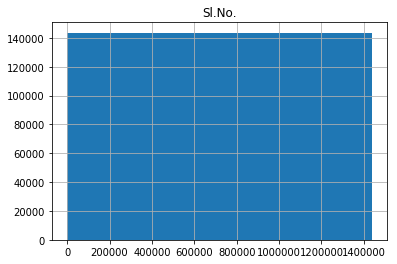

In [6]:
# draw the histogram of yelp dataset
df.hist()

In [7]:
# Change the count of number of records here
count_limit=1000

# Pre-Processing the data-set
import nltk
from nltk.corpus import stopwords
# BeautifulSoup is used to remove html tags from the text
from bs4 import BeautifulSoup 
import re # For regular expressions

# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
#nltk.download('popular')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# This function splits a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

sentences = []

line_count=0
print("Parsing sentences from training set")
for review in df["Reviews"]:
    if line_count==0:
        line_count+=1
    else:
        sentences += review_sentences(review, tokenizer)
        line_count+=1
    if line_count==count_limit:
        break
        
        
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)


Parsing sentences from training set


/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
2019-10-02 16:05:47,042 : INFO : 'pattern' package not found; tag filters are not available for English
2019-10-02 16:05:47,048 : INFO : collecting all words and their counts
2019-10-02 16:05:47,048 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-02 16:05:47,075 : INFO : collected 8990 word types from a corpus of 128422 raw words and 9659 sentences
2019-10-02 16:05:47,075 : INFO : Loading a fresh vocabulary
2019-10-02 16:05:47,080 : INFO : effective_min_count=40 retains 436 unique words (4% of original 8990

Training model....


2019-10-02 16:05:47,295 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-10-02 16:05:47,302 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-02 16:05:47,303 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-02 16:05:47,303 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-02 16:05:47,304 : INFO : EPOCH - 3 : training on 128422 raw words (58059 effective words) took 0.1s, 948713 effective words/s
2019-10-02 16:05:47,365 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-10-02 16:05:47,370 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-02 16:05:47,376 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-02 16:05:47,377 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-02 16:05:47,377 : INFO : EPOCH - 4 : training on 128422 raw words (57719 effective words) took 0.1s, 918741 effective words/s
2019

In [8]:
# No need to run this code snippet if we do not want to include 
# this feature for training
# Count Vectorization Feature
# Pre-process the data
def process_text(text):
    text = text.lower()
    text = text.replace(',', ' ')
    text = text.replace('/', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace('.', ' ')

    # Convert text string to a list of words
    return text.split()


# Generate ngrams
def generate_ngrams(words_list, n):
    ngrams_list = []

    for num in range(0, len(words_list)):
        ngram = ' '.join(words_list[num:num + n])
        ngrams_list.append(ngram)

    return ngrams_list

# Calculate unigrams
text = ""
i = 0

line_count=0
for row in df['Reviews']:
    if line_count==0:
        line_count+=1
    else:
        text = text + row
        line_count+=1
    if line_count==count_limit:
        break
    
    
words_list = process_text(text)
unigrams = generate_ngrams(words_list, 1)
the_list = []
s = set(unigrams)
s1 = list(s)

# Get Count Vectors
line_count=0
for row in df['Reviews']:
    if line_count==0:
        line_count+=1
    else:
        encode_text =[one_hot(i, 15) for i in [row]]
        #words = row.split(" ")
        #bag_vector = np.zeros(len(s1))
        #for w in words:
            #if w in s:
                #a_index = s1.index(w)
                #bag_vector[a_index] += 1
        print (encode_text[0])
        #the_list.append(encode_text[0])
        line_count+=1
    if line_count==count_limit:
        break
    
dataset = the_list
y=[]

# Get Labels
line_count=0
for row in df['Ratings']:
    if line_count==0:
        line_count+=1
    else:
        y.append(row)
        line_count+=1
    if line_count==count_limit:
        break
    

NameError: name 'one_hot' is not defined

In [9]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

# Calculating average feature vector for training set
clean_train_reviews = []


line_count=0

for review in df["Reviews"]:
    if line_count==0:
        line_count+=1
    else:
        clean_train_reviews.append(review_wordlist(review, remove_stopwords=True))
        line_count+=1
    if line_count==count_limit:
        break

    
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

dataset = trainDataVecs
y=[]


line_count=0
for row in df['Ratings']:
    if line_count==0:
        line_count+=1
    else:
        y.append(row)
        line_count+=1
    if line_count==count_limit:
        break
    


Review 0 of 999


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [10]:
# Enable these lines if you want to use both the features in the model
#new_vector = np.column_stack((trainDataVecs, the_list))
#dataset = new_vector

In [11]:
# A list of all classifiers present in sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Split the dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.05, random_state=42)
neuron=100
# Create linear regression object
clf = MLPClassifier(solver='lbfgs',activation='relu', alpha=0.000001,hidden_layer_sizes=(neuron,10,), random_state=1)

# Define Classifiers
clfGNB=GaussianNB()
clfSVC=SVC(gamma='auto')
clfKNC=KNeighborsClassifier()
clfRFC10=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clfRFC100 = RandomForestClassifier(n_estimators = 100)


# Train/fit the model using the training sets
clfGNB.fit(np.nan_to_num(X_train),np.nan_to_num(y_train))
clfSVC.fit(np.nan_to_num(X_train),np.nan_to_num(y_train))
clfKNC.fit(np.nan_to_num(X_train),np.nan_to_num(y_train))
clfRFC10.fit(np.nan_to_num(X_train),np.nan_to_num(y_train))
clfRFC100.fit(np.nan_to_num(X_train),np.nan_to_num(y_train))
clf.fit(np.nan_to_num(X_train),np.nan_to_num(y_train))

# Make predictions using the testing set
y_pred = clf.predict(np.nan_to_num(X_test))

# The coefficients/ accuracy score for each classifiers
print("Mean accuracy on the entire test set using relu layer and 1000 nodes on MLPClassifier is :"+str(clf.score(np.nan_to_num(X_test),y_test)))
print("Mean accuracy on the entire test set using Gaussian Naive Bayes Model  is :"+str(clfGNB.score(np.nan_to_num(X_test),y_test)))

print("Mean accuracy on the entire test set using SV Classifier Model  is :"+str(clfSVC.score(np.nan_to_num(X_test),y_test)))

print("Mean accuracy on the entire test set using K neighbor Classifier Model  is :"+str(clfKNC.score(np.nan_to_num(X_test),y_test)))

print("Mean accuracy on the entire test set using Random Forest Classifier using 10 n_estimators Model  is :"+str(clfRFC10.score(np.nan_to_num(X_test),y_test)))

print("Mean accuracy on the entire test set using Random Forest Classifier using 100 n_estimators Model  is :"+str(clfRFC100.score(np.nan_to_num(X_test),y_test)))



# Q-2- Precision & Recall values for MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Macro score
print('Macro Precision score:',precision_score(y_test, y_pred, average='macro'))
print('Macro Recall score:',recall_score(y_test, y_pred, average='macro') )

# Micro Score
print('Micro Precision score:',precision_score(y_test, y_pred, average='micro'))
print('Micro Recall score:',recall_score(y_test, y_pred, average='micro') )

# Weighted score
print('Weighted Precision score:',precision_score(y_test, y_pred, average='weighted'))
print('Weighted Recall score:',recall_score(y_test, y_pred, average='weighted') )




Mean accuracy on the entire test set using relu layer and 1000 nodes on MLPClassifier is :0.7
Mean accuracy on the entire test set using Gaussian Naive Bayes Model  is :0.18
Mean accuracy on the entire test set using SV Classifier Model  is :0.7
Mean accuracy on the entire test set using K neighbor Classifier Model  is :0.58
Mean accuracy on the entire test set using Random Forest Classifier using 10 n_estimators Model  is :0.7
Mean accuracy on the entire test set using Random Forest Classifier using 100 n_estimators Model  is :0.68
Macro Precision score: 0.2333333333333333
Macro Recall score: 0.3333333333333333
Micro Precision score: 0.7
Micro Recall score: 0.7
Weighted Precision score: 0.49
Weighted Recall score: 0.7


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
#  Classification Report for MLPClassifier 
from sklearn.metrics import classification_report

# Name of the classes
target_names = ['Negative', 'Neutral', 'Positive']

# Print the report
print("*************** A Detailed Classification Report ****************")
print(classification_report(y_test, y_pred,target_names=target_names))

*************** A Detailed Classification Report ****************
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.00      0.00      0.00         8
    Positive       0.70      1.00      0.82        35

    accuracy                           0.70        50
   macro avg       0.23      0.33      0.27        50
weighted avg       0.49      0.70      0.58        50



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix of the model on test dataset: [[[43  0]
  [ 7  0]]

 [[42  0]
  [ 8  0]]

 [[ 0 15]
  [ 0 35]]]
Confusion matrix, without normalization
[[ 0  0  7]
 [ 0  0  8]
 [ 0  0 35]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


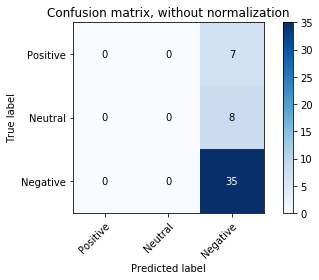

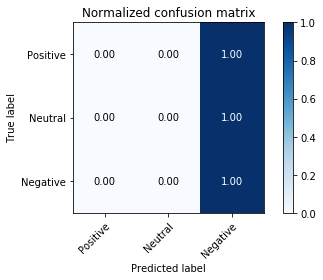

In [13]:
#  Confusion matrix for MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix
print("Confusion matrix of the model on test dataset:",multilabel_confusion_matrix(y_test, y_pred))

# Now lets plot the values of the confusion matrix
# Attributed from the exampled given in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names=['Positive','Neutral','Negative']
import numpy as np
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of 

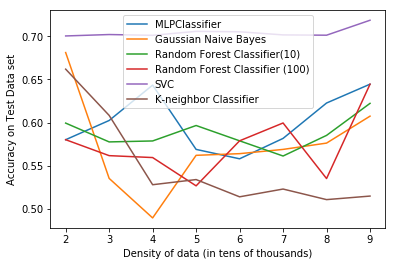

In [14]:
# We will plot a comparison graph for all the classifiers used
# Accuray Vs size of the dataset
from sklearn.model_selection import cross_val_score
neurons=range(2,10)
mlp_score=[]
gnb_score=[]
rfc10_score=[]
rfc100_score=[]
svc_score=[]
knc_score=[]

for n in neurons:
    
    score=cross_val_score(clf, np.nan_to_num(X_test),y_test, cv=n,scoring='accuracy')
    mlp_score.append(score.mean())

    
    score = cross_val_score(clfGNB, np.nan_to_num(X_test),y_test, cv=n,
                            scoring='accuracy')
    gnb_score.append(score.mean())
    score = cross_val_score(clfRFC10, np.nan_to_num(X_test),y_test, cv=n,
                            scoring='accuracy')
    rfc10_score.append(score.mean())
    score = cross_val_score(clfRFC100, np.nan_to_num(X_test),y_test, cv=n,
                            scoring='accuracy')
    rfc100_score.append(score.mean())
    score = cross_val_score(clfSVC, np.nan_to_num(X_test),y_test, cv=n,
                            scoring='accuracy')
    svc_score.append(score.mean())
    score = cross_val_score(clfKNC, np.nan_to_num(X_test),y_test, cv=n,
                            scoring='accuracy')
    knc_score.append(score.mean())


plt.plot(neurons,mlp_score)
plt.plot(neurons,gnb_score)
plt.plot(neurons,rfc10_score)
plt.plot(neurons,rfc100_score)
plt.plot(neurons,svc_score)
plt.plot(neurons,knc_score)

plt.legend(['MLPClassifier','Gaussian Naive Bayes','Random Forest Classifier(10)','Random Forest Classifier (100)','SVC','K-neighbor Classifier'])
plt.xlabel("Density of data (in tens of thousands)")
plt.ylabel("Accuracy on Test Data set")
plt.show()